In [1]:
import wandb
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

api = wandb.Api()

# Get the runs with the tag 'enemy6'


enemies = ['enemy6', 'enemy7', 'enemy8']
muttypes = ['standard', 'non_uniform']
dataPool = []

for enemy in tqdm(enemies):
    for muttype in tqdm(muttypes):
        fitnesses = []
        runs = api.runs(
            "wouterbesse/Evoman Project 1",
            {"$and": [ {"tags": enemy}, {"state": "finished"}, {"config.muttype": muttype} ]},
        )
        for run in tqdm(runs):
            try:
                fitnesses.append(run.history()["Fitness/Best"])
            except:
                print(run.name, run.config)
        dataPool.append(np.array(fitnesses))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Evoman_Enemy6_NonUnMult9_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy6_NonUnMult8_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy6_NonUnMult7_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy6_NonUnMult6_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_

  0%|          | 0/20 [00:00<?, ?it/s]

Evoman_Enemy6_NonUnMult9_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy6_NonUnMult8_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy6_NonUnMult7_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy6_NonUnMult6_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Evoman_Enemy7_NonUnMult9_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy7_NonUnMult8_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy7_NonUnMult7_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy7_NonUnMult6_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_

  0%|          | 0/20 [00:00<?, ?it/s]

Evoman_Enemy7_NonUnMult9_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy7_NonUnMult8_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy7_NonUnMult7_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy7_NonUnMult6_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Evoman_Enemy8_NonUnMult9_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy8_NonUnMult8_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy8_NonUnMult7_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy8_NonUnMult6_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'standard', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_

  0%|          | 0/20 [00:00<?, ?it/s]

Evoman_Enemy8_NonUnMult9_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy8_NonUnMult8_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy8_NonUnMult7_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 'experiment_name': 'dummy'}
Evoman_Enemy8_NonUnMult6_testBest {'gens': 500, 'npop': 100, 'dom_l': -1, 'dom_u': 1, 'train': False, 'muttype': 'non_uniform', 'mutation': 0.3, 'last_best': 0, 'activation': ['relu', 'relu', 'sig'], 'archetecture': [20, 10, 5], 

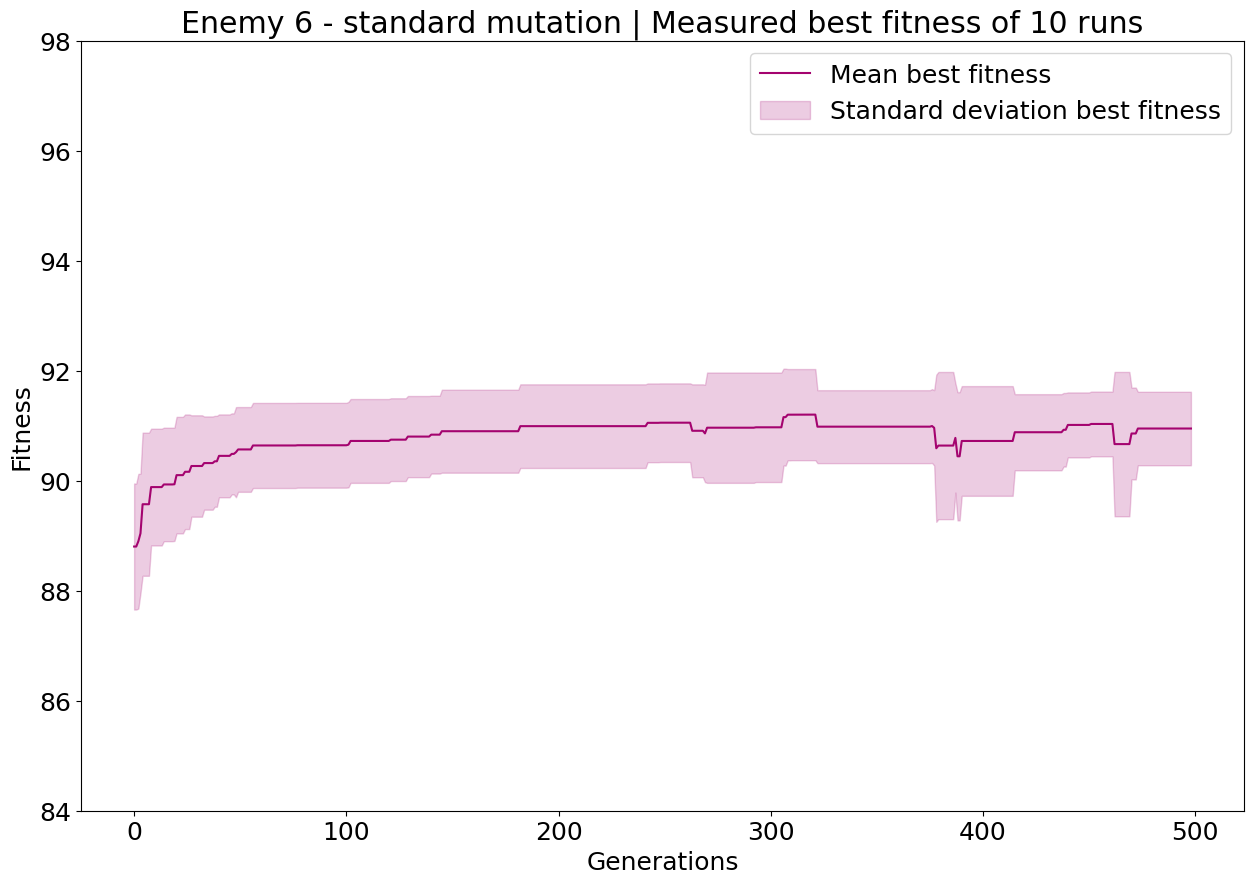

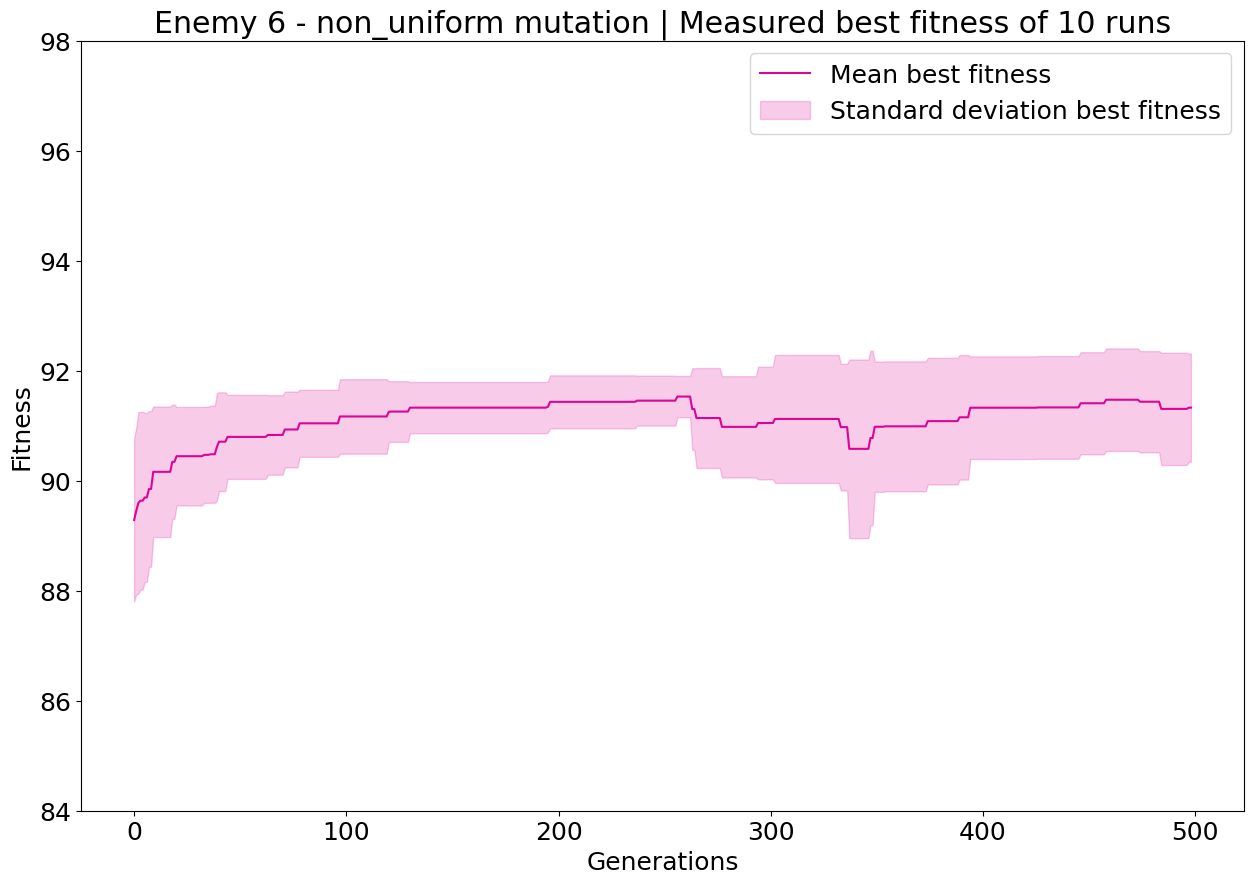

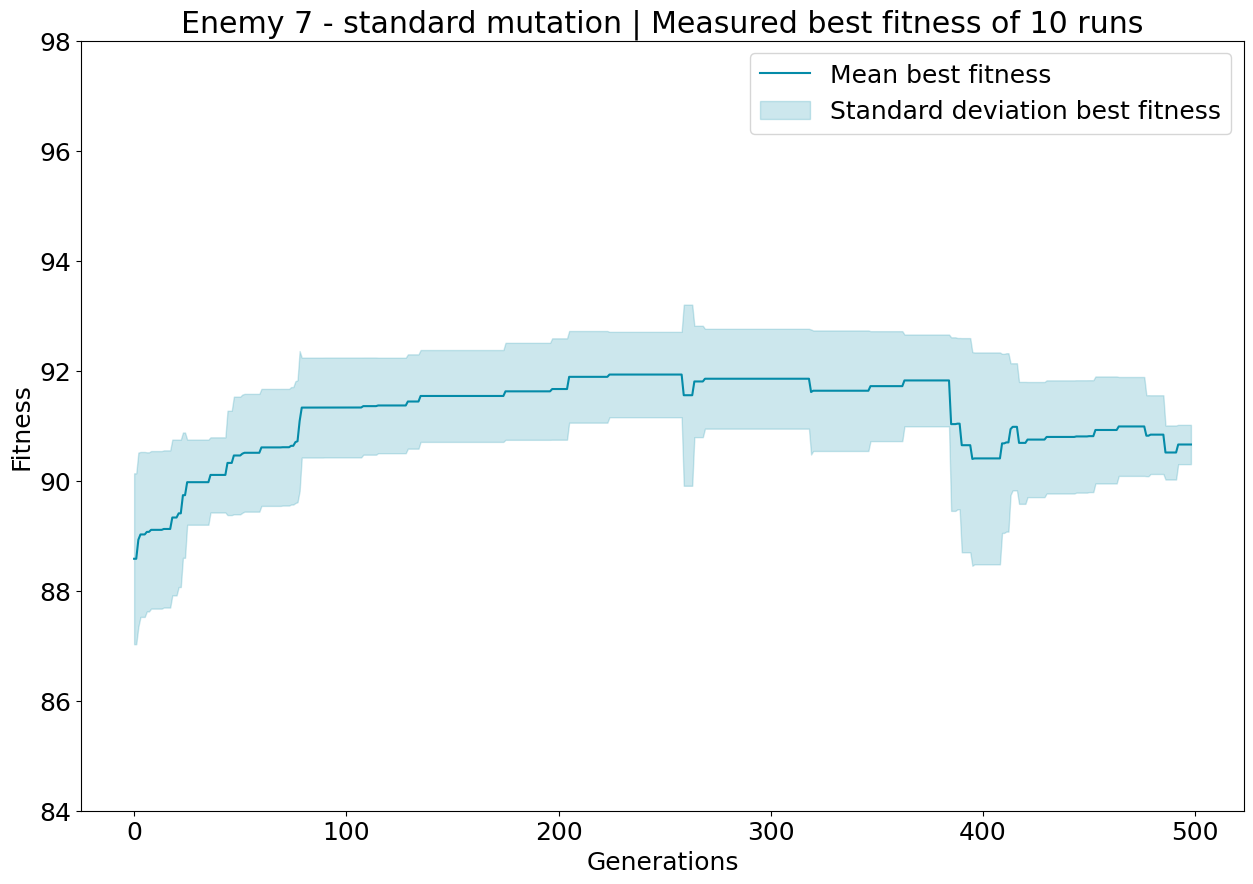

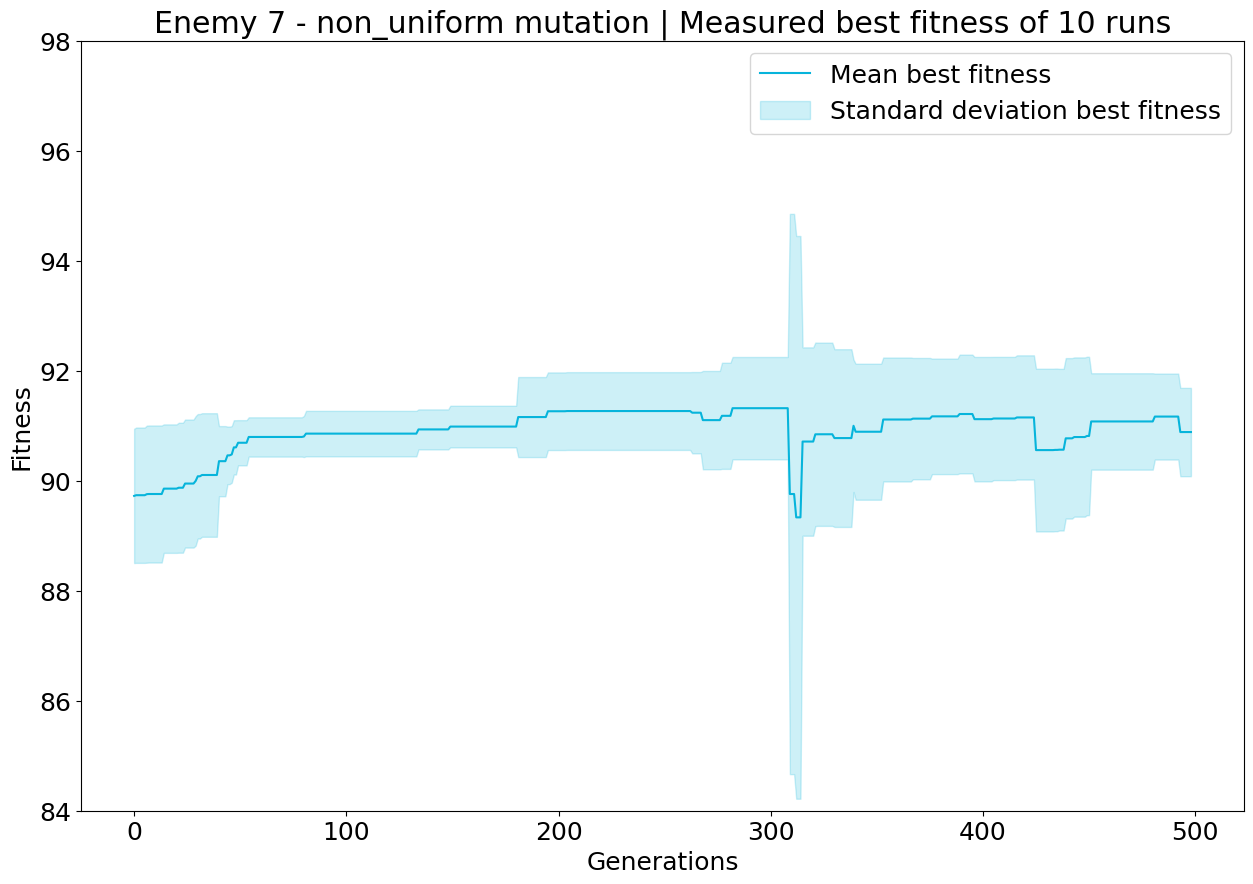

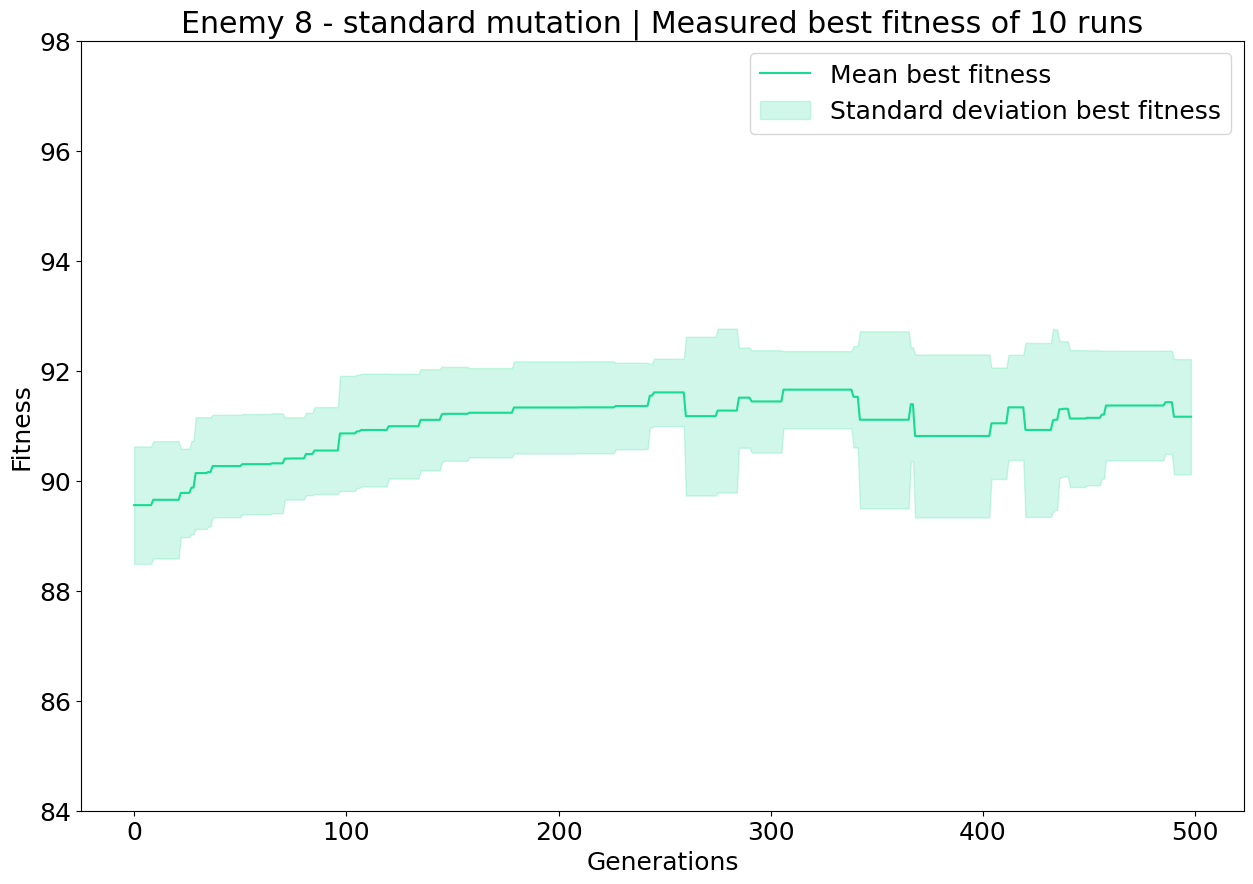

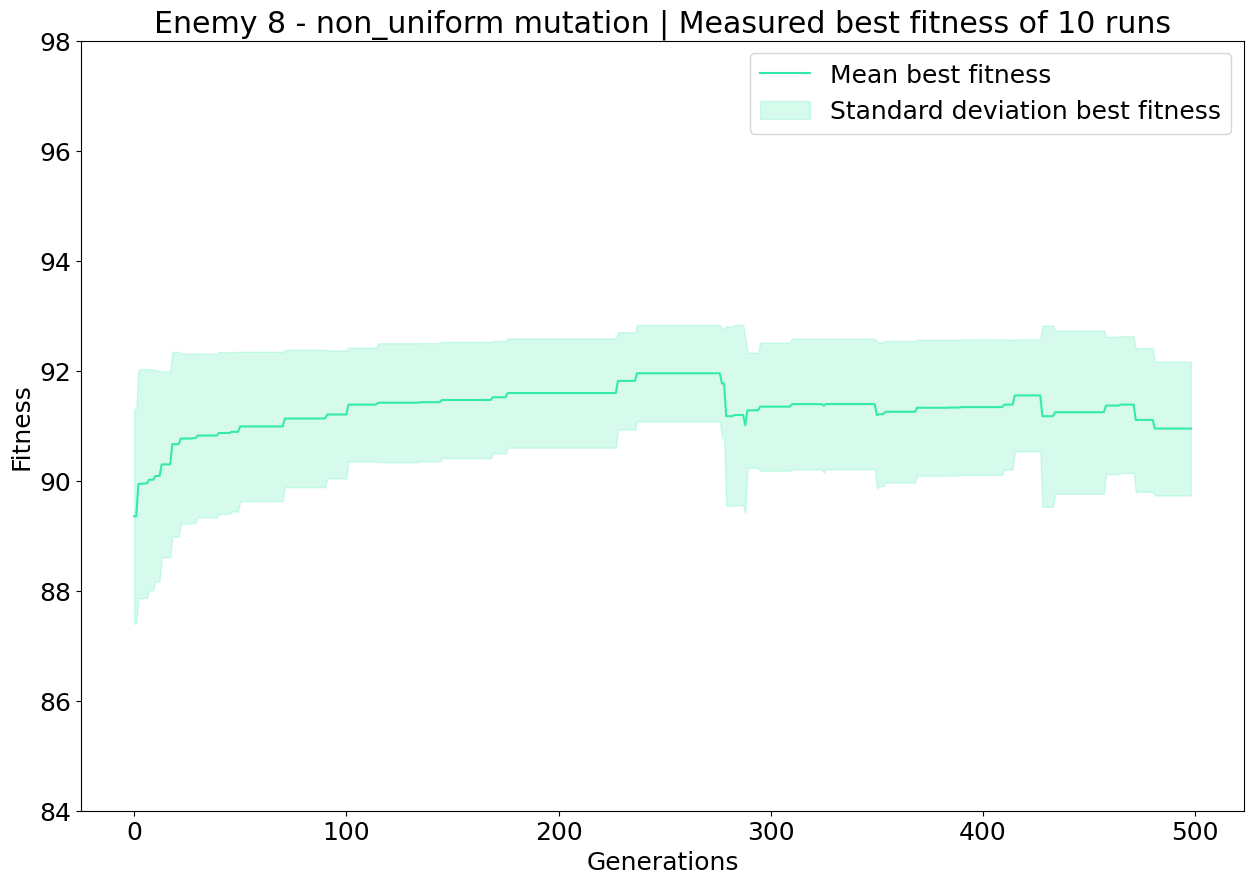

In [7]:
import os

# Get the maximum and minimum value of all runs
max_values = float('-inf')
min_values = float('inf')

for i, enemy in enumerate(enemies):
    for j, muttype in enumerate(muttypes):
        npfitnesses = dataPool[i*2+j]
        max_values = max(max_values, np.max(npfitnesses))
        min_values = min(min_values, np.min(npfitnesses))

# Graphs
colors = ['#A4036F', '#FB23B3', '#048BA8', '#38D6FA', '#16DB93', '#6AF0BF']

for i, enemy in enumerate(enemies):
    for j, muttype in enumerate(muttypes):
        npfitnesses = dataPool[i*2+j]
        meanfitness = np.mean(npfitnesses, axis=0)
        sdfitness = np.std(npfitnesses, axis=0)

        plt.rcParams.update({'font.size': 18})
        plt.plot(meanfitness, color=colors[i*2+j])
        plt.fill_between(range(len(meanfitness)), meanfitness-sdfitness, meanfitness+sdfitness, alpha=0.2, color=colors[i*2+j])
        plt.title(f"Enemy {i + 6} - {muttype} mutation | Measured best fitness of 10 runs")
        plt.xlabel("Generations")
        plt.ylabel("Fitness")
        plt.legend(["Mean best fitness", "Standard deviation best fitness"])
        plt.ylim([84, 98])
        # set width
        plt.gcf().set_size_inches(15, 10)
        
        # Save the plot
        # make the dir if it doesnt exist

        if not os.path.exists("plots"):
            os.makedirs("plots")

        plt.savefig(f"plots/enemy{i+6}_{muttype}.png")
        plt.show()

# Set width of figure, and fontsize